# Mod 3 Project
## Classification of
mod3project

## Important Functions

In [1]:
#import files

from bs4 import BeautifulSoup
import pandas as pd
import json
import time
import requests
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
def get_reviews(appid, start_offset=0, fil='updated', review_type='all'):
    url = 'https://store.steampowered.com'
    reviews = '/appreviews/'
    p = {'day_range':'9223372036854775807', 
         'start_offset':start_offset, 
         'language':'english', 
         'filter':fil, 
         'review_type':review_type,
         'purchase_type':'all'}
    r = requests.get(url+reviews+str(appid)+'?json=1?', params=p).json()
    return r

In [3]:
def get_review_content(df):
    return [df['reviews'][i]['review'] for i in range(len(df['reviews']))]

In [4]:
def get_steamlist():
    return requests.get('http://api.steampowered.com/ISteamApps/GetAppList/v0002/').json()

games_df = pd.DataFrame(get_steamlist()['applist']["apps"])
games = get_steamlist()['applist']["apps"]

In [5]:
def get_appid(name, games):
    for i in range(len(games['name'])):
        if games['name'][i].title() == name.title():
            return games['appid'][i]
    return "Did not find"

def get_game_info(appid):
    url = 'https://store.steampowered.com'
    ids = str(appid)
    r = requests.get(url+'/api/appdetails?appids='+ids).json()
    return r

In [6]:
# we ended last on Tuesday on 15,000

def retrieve_steam_data(start, end):
    data_from_steam_ = []
    for num, game in enumerate(games[start: end]):
        if game["appid"] >= 10:
            data_from_steam_.append(get_game_info(game["appid"]))
        if num % 100 == 0:
            t = np.random.choice([1,1.1,1.2,1.3,1.4,1.5])
            print(num, t)
            time.sleep(t)
    return data_from_steam_ 
    
def get_reviews(appid, start_offset=0, fil='updated', review_type='all'):
    url = 'https://store.steampowered.com'
    reviews = '/appreviews/'
    p = {'day_range':'9223372036854775807', 
         'start_offset':start_offset, 
         'language':'english', 
         'filter':fil, 
         'review_type':review_type,
         'purchase_type':'all'}
    r = requests.get(url+reviews+str(appid)+'?json=1?', params=p).json()
    return r


In [7]:
def save_data(data, file_to_save_to):
        """takes in a filename to save to"""
        with open(file_to_save_to, 'w') as outfile:
            json.dump(data, outfile)

In [8]:
def open_save_data(file_to_open):
        """takes in a filename to open
           return """
        with open(file_to_open) as datajson:
            new_data =json.load(datajson)
        return new_data

# Open Json Files

In [9]:
k10 = open_save_data("10K_data.json")
k15 = open_save_data("15K_data.json")
k20 = open_save_data("test_20k.json")
k30 = open_save_data("30K_data.json")
k40_1k = open_save_data("1000_data_30000.json")
k40_2k = open_save_data("2000_data_30000.json")
k40_3k = open_save_data("3000_data_30000.json")
k40_4k = open_save_data("4000_data_30000.json")
k40_5k = open_save_data("5000_data_30000.json")
k40_6k = open_save_data("6000_data_30000.json")
k40_7k = open_save_data("7000_data_30000.json")
k40_8k = open_save_data("8000_data_30000.json")
k40_9k = open_save_data("9000_data_30000.json")
k40_10k = open_save_data("test_40k.json")
k50 = open_save_data("50K_data.json")
k60 = open_save_data("60K_data.json")
t1 = open_save_data('1000_data_60000.json')
t2 = open_save_data('2000_data_60000.json')
t3 = open_save_data('3000_data_60000.json')
t4 = open_save_data('4000_data_60000.json')
t5 = open_save_data('5000_data_60000.json')
k76 = open_save_data('76K_data.json')

# Combine to 1 complete dataset

In [11]:
all_30K = k10+k15+k20+k30
all_40K = k10+k15+k20+k30+k40_1k+k40_2k+k40_3k+k40_4k+k40_5k+k40_6k+k40_7k+k40_8k+k40_9k+k40_10k
all_50K = all_40K + k50
all_60K = all_50K + k60
k65 = t1+t2+t3+t4+t5
some_30K_40K = k40_1k+k40_2k+k40_3k+k40_4k+k40_5k+k40_6k+k40_7k+k40_8k+k40_9k+k40_10k
k60_k76 = k65+k76
all_76K = all_60K + k65+k76

# Functions for Initial Clean

In [12]:
# helper for the clean non_id
def del_unwanted(dic, unwanted_lst):
    dic_copy = copy.deepcopy(dic)
    for key in unwanted_lst:
        if key in dic_copy:
            del dic_copy[key]
    return dic_copy

def clean_non_id_data(games_list, start, end):
    data_dic_lst = []
    data_f = copy.deepcopy(games_list)
    for game in data_f[start:end]:
        if type(game) == dict:
            for key, val in game.items():
                if "success" in val:
                        del val["success"]
                if val != {}:
                    new_val = del_unwanted(val["data"], ["header_image", "website", "packages", "package_groups",
                                                        "screenshots", "movies", "support_info", "background",
                                                        "content_descriptors", "controller_support", "drm_notice",
                                                        "ext_user_account_notice", "detailed_description", 
                                                        "short_description", "legal_notice", "linux_requirements",
                                                        "mac_requirements", "fullgame", "publishers", "demos",
                                                        "pc_requirements", "release_date", 'alternate_appid', 
                                                         "release_date"])
            
                    data_dic_lst.extend([new_val])
    return data_dic_lst

## Removing Columns we don't need

In [13]:
cleaned_76K = clean_non_id_data(all_76K,0, len(all_76K))
len(cleaned_76K)

25953

In [14]:
# final copy
# save_data(cleaned_76K, 'ALL_cleaned.json')
cleaned_76K = open_save_data('ALL_cleaned.json')

## More cleaning organizing columns

In [15]:
cats = ["Single-player", "Multi-player", 'Online Multi-Player', 'Local Multi-Player', 'Co-op', 
                'Online Co-op', 'Local Co-op', 'Shared/Split Screen', 'Cross-Platform Multiplayer', ]
genres = ['Action','Adventure', 'Indie', 'Casual', 'Massively Multiplayer', 'Racing', 'RPG', "Simulation", 
          "Strategy", "Sports", "Free to Play", "Early Access"]

platforms_lst = ["windows", "mac", "linux"]

def get_clean_dummies(clean_dic, desc_key, descriptions, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        for key in descriptions:
            data[key] = 0
        if desc_key in data:
            for cat in data[desc_key]:
                if cat["description"] in descriptions:
                    data[cat["description"]] = 1
            del data[desc_key]
    return cleaned


def get_platform_dummies(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned: 
        if "platforms" in data:
            for key in platforms_lst:
                data[key] = 0 
                if key in data["platforms"]:
                    data[key] = int(data["platforms"][key])
        else:
            for key in platforms_lst:
                data[key] = 0 
        del data["platforms"]
    return cleaned

def get_total_from_dic(clean_dic, column, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if column in data:
            data[column] = data[column]["total"]
        else:
            data[column] = 0
    return cleaned

def get_metas_from_dic(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "metacritic" in data:
            data["metacritic"] = data["metacritic"]["score"]
        else:
            data["metacritic"] = 0
    return cleaned

def clean_dev(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    cleaned = copy.deepcopy(clean_dic)
    for data in cleaned:
        if "developers" in data:
            data["developers"] = ", ".join(data["developers"])
        else:
            data["developers"] = ""
    return cleaned

def dlc_reformatting(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "dlc" in data:
            data["dlc"] = len(data["dlc"])
        else:
            data["dlc"] = 0
    return cleaned

# def date_reformatting(clean_dic, keep=True):
#     if keep:
#         cleaned = copy.deepcopy(clean_dic)
#     else:
#         cleaned = clean_dic
#     for data in cleaned:
#         if "release_date" in data:
#             if data["release_date"]["date"][:3] in months:
#                 data["release_date"] = months[data["release_date"]["date"][:3]]
#             else:
#                 data["release_date"] = 0
#         else:
#                 data["release_date"] = 0
#     return cleaned

def convert_to_1_0(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "is_free" in data:
            data["is_free"] = int(data["is_free"])
        else:
            data["is_free"] = 0
    return cleaned

def clean_money(clean_dic, nans_to_zero=False, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "price_overview" in data:
            if data["price_overview"]["currency"] == "USD":
                data["price_overview"] = round(data["price_overview"]["final"]*.01, 2)
            else:
                data["price_overview"] = 0
        else:
            if nans_to_zero:
                data["price_overview"] = 0
    return cleaned

def clean_language(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "supported_languages" in data:
            data["num_supported_languages"] = len(data["supported_languages"].split(","))
            del data["supported_languages"]
        else:
             data["num_supported_languages"] = 1
        
    return cleaned


In [16]:
cats = ["Single-player", "Multi-player", 'Online Multi-Player', 'Local Multi-Player', 'Co-op', 
                'Online Co-op', 'Local Co-op', 'Shared/Split Screen', 'Cross-Platform Multiplayer', ]
genres = ['Action','Adventure', 'Indie', 'Casual', 'Massively Multiplayer', 'Racing', 'RPG', "Simulation", 
          "Strategy", "Sports", "Free to Play", "Early Access"]

def clean_data(dirty_dic, keep=False):
    clean_money(dirty_dic, True, keep)
    clean_dev(dirty_dic, keep)
    convert_to_1_0(dirty_dic, keep)
    dlc_reformatting(dirty_dic, keep)
    get_clean_dummies(dirty_dic, "categories", cats, keep)
    get_clean_dummies(dirty_dic, "genres", genres, keep)
    get_total_from_dic(dirty_dic, "recommendations", keep)
    get_total_from_dic(dirty_dic, "achievements", keep)
    get_platform_dummies(dirty_dic, keep)
    get_metas_from_dic(dirty_dic, keep)
    clean_language(dirty_dic, keep=keep)
    return pd.DataFrame(dirty_dic)

In [17]:
df_cleaned_76K = clean_data(cleaned_76K)
df_cleaned_76K.shape
#all cleaned

(25953, 38)

# Quick Exploration of the Data

In [18]:
df_cleaned_76K.columns

Index(['Action', 'Adventure', 'Casual', 'Co-op', 'Cross-Platform Multiplayer',
       'Early Access', 'Free to Play', 'Indie', 'Local Co-op',
       'Local Multi-Player', 'Massively Multiplayer', 'Multi-player',
       'Online Co-op', 'Online Multi-Player', 'RPG', 'Racing',
       'Shared/Split Screen', 'Simulation', 'Single-player', 'Sports',
       'Strategy', 'about_the_game', 'achievements', 'developers', 'dlc',
       'is_free', 'linux', 'mac', 'metacritic', 'name',
       'num_supported_languages', 'price_overview', 'recommendations',
       'required_age', 'reviews', 'steam_appid', 'type', 'windows'],
      dtype='object')

In [19]:
df_cleaned_76K.describe()

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,dlc,is_free,linux,mac,metacritic,num_supported_languages,price_overview,recommendations,steam_appid,windows
count,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,...,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,2.595300e+04,2.595300e+04,25953.000000
mean,0.342542,0.263862,0.259508,0.104150,0.062228,0.056834,0.062806,0.515123,0.026818,0.042115,...,0.305552,0.122375,0.212153,0.317420,3.747544,3.252187,5.974892,4.027010e+02,5.721254e+05,0.999306
std,0.474569,0.440734,0.438373,0.305461,0.241574,0.231529,0.242618,0.499781,0.161553,0.200854,...,6.709419,0.327725,0.408840,0.465481,16.192600,4.351416,10.854474,1.534542e+04,2.530525e+05,0.026327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000e+01,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,3.693700e+05,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.990000,0.000000e+00,5.567100e+05,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,7.990000,0.000000e+00,7.799340e+05,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,510.000000,1.000000,1.000000,1.000000,96.000000,29.000000,595.990000,2.182507e+06,1.055950e+06,1.000000


In [20]:
df_cleaned_76K[df_cleaned_76K.price_overview > 100]

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,metacritic,name,num_supported_languages,price_overview,recommendations,required_age,reviews,steam_appid,type,windows
1641,0,0,0,0,0,0,0,0,0,0,...,0,VEGAS Pro 15 Edit Steam Edition,4,359.00,0,0,NaN,689790,game,1
2171,0,0,0,0,0,0,0,0,0,0,...,0,Strata Design 3D SE - CX Upgrade,1,149.99,0,0,NaN,671070,dlc,1
2709,1,1,0,0,0,0,0,1,0,0,...,0,CrisisActionVR,2,199.99,0,0,NaN,648070,game,1
6044,0,0,0,0,0,0,0,0,0,0,...,0,Marmoset Toolbag 3,1,189.00,0,0,NaN,550060,game,1
6258,0,0,0,0,0,0,1,0,0,0,...,0,Skyforge - Costume Booster Pack,3,119.99,0,0,NaN,546374,dlc,1
9802,0,0,0,0,0,0,0,0,0,0,...,0,ADR-Labelling Game,4,595.99,0,0,NaN,821800,game,1
9971,1,1,0,0,0,0,0,1,0,0,...,0,INFINITY CHALLENGE,1,199.99,0,0,NaN,819660,game,1
10003,0,0,0,0,0,0,0,0,0,0,...,0,Facerig Studio for Individual VTubers w/Live2D,9,450.00,0,0,NaN,816940,dlc,1
10094,0,0,0,0,1,0,1,0,0,0,...,0,Call of War: Global Domination Pack,11,199.99,0,0,NaN,815356,dlc,1
10221,0,0,0,0,0,0,0,0,0,0,...,0,Dollal Simulator Gold Edition,1,199.99,0,0,NaN,807410,dlc,1


In [21]:
# pd.plotting.scatter_matrix(df_cleaned_15K);

Alot of variables

# Gathering Review Data

## Functions to Clean

In [22]:
#def clean_text(text):

def clean_review(lst_reviews):
    check = ['review_score','total_positive', 'total_negative', 'total_reviews']
    data_storage = []
    for rev in lst_reviews:
        app_id = list(rev.keys())[0]
        review_dict = {}
        review_dict["steam_appid"] = int(app_id)
        review_dict["reviews"] = ""
        for key in check:
            if "query_summary" in rev[app_id]:
                if key in rev[app_id]["query_summary"]:
                    review_dict[key] = rev[app_id]["query_summary"][key]
        if "reviews" in rev[app_id]:
            for text in rev[app_id]["reviews"]:
                review_dict["reviews"] += " " + text["review"]
        data_storage.append(review_dict)
    return data_storage

In [23]:
review_try_1 = open_save_data("reviews_from_first_clean30k.json")

In [24]:
review_try_2 = open_save_data("reviews_from_clean30k_50k.json")

In [25]:
review_try_3 = open_save_data("reviews_from_clean50K_60K.json")

In [26]:
review_try_4 = open_save_data("reviews_from_clean60K_76K.json")

In [27]:
review_try_4[0]

{'10': {'success': 1,
  'query_summary': {'num_reviews': 20,
   'review_score': 9,
   'review_score_desc': 'Overwhelmingly Positive',
   'total_positive': 32367,
   'total_negative': 964,
   'total_reviews': 33331},
  'reviews': [{'recommendationid': '49803728',
    'author': {'steamid': '76561198407734752',
     'num_games_owned': 39,
     'num_reviews': 9,
     'playtime_forever': 526,
     'playtime_last_two_weeks': 1,
     'last_played': 1552778818},
    'language': 'english',
    'review': 'Perfect childhood game!',
    'timestamp_created': 1553770027,
    'timestamp_updated': 1553770027,
    'voted_up': True,
    'votes_up': 0,
    'votes_funny': 0,
    'weighted_vote_score': 0,
    'comment_count': 0,
    'steam_purchase': True,
    'received_for_free': False,
    'written_during_early_access': False},
   {'recommendationid': '49802949',
    'author': {'steamid': '76561198815796326',
     'num_games_owned': 18,
     'num_reviews': 1,
     'playtime_forever': 212,
     'playtime_

In [28]:
review_combo = review_try_1 + review_try_2 + review_try_3 + review_try_4

In [29]:
len(review_combo)

25953

In [30]:
review_for_df_final = clean_review(review_combo)

Making sure our data two DF match up

In [31]:
df_cleaned_final_final = df_cleaned_76K.drop("reviews", axis=1).copy()

In [32]:
len(review_for_df_final)

25953

In [33]:
len(df_cleaned_final_final)

25953

In [34]:
# df for all the reviews
df_all_76K_rev = pd.DataFrame(review_for_df_final)

In [ ]:
# df_all_76K_rev.to_json("FINAL_REVIEW.json")

## Removing Duplicates

In [ ]:


AUC ROC Fang Fang lecture

In [35]:
# remove duplicates from reviews
df_rev_no_dups_final = df_all_76K_rev.drop_duplicates("steam_appid")

In [36]:
df_rev_no_dups_final.shape

(22646, 6)

In [37]:
# remove duplicates from original df of game info
df_cleaned_final_final = df_cleaned_final_final.drop_duplicates("steam_appid")

In [38]:
df_cleaned_final_final.shape

(22646, 37)

## Sort and Merge Review and game info DF

In [39]:
df_review_final = df_rev_no_dups_final.sort_values("steam_appid")

In [40]:
df_cleaned_final = df_cleaned_final_final.sort_values("steam_appid")

In [41]:
df_cleaned_final.shape

(22646, 37)

In [42]:
df_review_final.shape

(22646, 6)

In [43]:
final_df = df_cleaned_final.merge(df_review_final, on="steam_appid")

In [44]:
final_df

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,recommendations,required_age,steam_appid,type,windows,review_score,reviews,total_negative,total_positive,total_reviews
0,1,0,0,0,0,0,0,0,0,1,...,65391,0,10,game,1,9.0,Perfect childhood game! Acest joc pot sa spun...,964.0,32367.0,33331.0
1,1,0,0,0,0,0,0,0,0,1,...,2786,0,20,game,1,8.0,i have no idea what im doing. I've always lik...,405.0,2172.0,2577.0
2,1,0,0,0,0,0,0,0,0,0,...,1979,0,30,game,1,8.0,Too many hicks in this game! Zivoragnom!!! Ve...,191.0,1660.0,1851.0
3,1,0,0,0,0,0,0,0,0,1,...,922,0,40,game,1,8.0,Shame no one plays it its kinda like roblox h...,134.0,708.0,842.0
4,1,0,0,0,0,0,0,0,0,0,...,4304,0,50,game,1,8.0,"Loved half-life 1, one of my favorite games. ...",163.0,2897.0,3060.0
5,1,0,0,0,0,0,0,0,0,0,...,2086,0,60,game,1,8.0,Quality Best game 10/10 and I love playing wi...,353.0,1870.0,2223.0
6,1,0,0,0,0,0,0,0,0,0,...,22113,0,70,game,1,9.0,Totally fun FPS shooter. It's Half Life...do ...,553.0,13736.0,14289.0
7,1,0,0,0,0,0,0,0,0,0,...,8807,0,80,game,1,8.0,A singleplayer Counter-Strike?! Great Game. 5...,466.0,4128.0,4594.0
8,1,0,0,0,0,0,0,0,0,0,...,3296,0,130,game,1,8.0,Released as the second expansion to the origi...,242.0,2102.0,2344.0
9,1,0,0,0,1,0,1,0,0,0,...,10409,0,440,game,1,8.0,its alright I guess. very such good game i've...,18615.0,286430.0,305045.0


In [45]:
# final_df.to_json("FINAL_DF.json")

In [46]:
final_df.describe()

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,metacritic,num_supported_languages,price_overview,recommendations,steam_appid,windows,review_score,total_negative,total_positive,total_reviews
count,22646.000000,22646.000000,22646.000000,22646.000000,22646.000000,22646.000000,22646.00000,22646.000000,22646.000000,22646.000000,...,22646.000000,22646.000000,22646.000000,2.264600e+04,2.264600e+04,22646.000000,22645.000000,22645.000000,22645.000000,22645.000000
mean,0.337322,0.261503,0.264638,0.100901,0.060585,0.057538,0.06085,0.509406,0.027245,0.045218,...,3.705246,3.250817,5.755506,4.014205e+02,6.027442e+05,0.999647,2.003003,48.529079,234.787414,283.316494
std,0.472806,0.439463,0.441150,0.301204,0.238572,0.232872,0.23906,0.499923,0.162801,0.207786,...,16.116310,4.376392,11.104048,1.618673e+04,2.565940e+05,0.018792,3.004088,1218.969026,6517.368144,7520.408667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000e+00,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000e+00,4.220850e+05,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,1.000000,2.990000,0.000000e+00,6.089415e+05,1.000000,0.000000,0.000000,1.000000,2.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,4.000000,6.990000,0.000000e+00,8.152325e+05,1.000000,5.000000,4.000000,12.000000,18.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,96.000000,29.000000,595.990000,2.182507e+06,1.055950e+06,1.000000,9.000000,119918.000000,857118.000000,977036.000000


In [47]:
final_df.columns

Index(['Action', 'Adventure', 'Casual', 'Co-op', 'Cross-Platform Multiplayer',
       'Early Access', 'Free to Play', 'Indie', 'Local Co-op',
       'Local Multi-Player', 'Massively Multiplayer', 'Multi-player',
       'Online Co-op', 'Online Multi-Player', 'RPG', 'Racing',
       'Shared/Split Screen', 'Simulation', 'Single-player', 'Sports',
       'Strategy', 'about_the_game', 'achievements', 'developers', 'dlc',
       'is_free', 'linux', 'mac', 'metacritic', 'name',
       'num_supported_languages', 'price_overview', 'recommendations',
       'required_age', 'steam_appid', 'type', 'windows', 'review_score',
       'reviews', 'total_negative', 'total_positive', 'total_reviews'],
      dtype='object')

In [48]:
final_df.drop("steam_appid", axis=1,inplace = True)

In [49]:
final_df.columns

Index(['Action', 'Adventure', 'Casual', 'Co-op', 'Cross-Platform Multiplayer',
       'Early Access', 'Free to Play', 'Indie', 'Local Co-op',
       'Local Multi-Player', 'Massively Multiplayer', 'Multi-player',
       'Online Co-op', 'Online Multi-Player', 'RPG', 'Racing',
       'Shared/Split Screen', 'Simulation', 'Single-player', 'Sports',
       'Strategy', 'about_the_game', 'achievements', 'developers', 'dlc',
       'is_free', 'linux', 'mac', 'metacritic', 'name',
       'num_supported_languages', 'price_overview', 'recommendations',
       'required_age', 'type', 'windows', 'review_score', 'reviews',
       'total_negative', 'total_positive', 'total_reviews'],
      dtype='object')

In [50]:
# sort for only games type
final_df = final_df[(final_df.type == "game")]

In [51]:
final_df.shape

(11127, 41)

In [52]:
# Null hypothesis price can not be classified by these features

In [53]:
# dropping extra columns because 
final_df0 = final_df.drop(['reviews','type', 'about_the_game', "developers"], axis=1) 

In [54]:
final_df0.drop("name", axis=1, inplace=True) 

In [55]:
final_df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11127 entries, 0 to 22645
Data columns (total 36 columns):
Action                        11127 non-null int64
Adventure                     11127 non-null int64
Casual                        11127 non-null int64
Co-op                         11127 non-null int64
Cross-Platform Multiplayer    11127 non-null int64
Early Access                  11127 non-null int64
Free to Play                  11127 non-null int64
Indie                         11127 non-null int64
Local Co-op                   11127 non-null int64
Local Multi-Player            11127 non-null int64
Massively Multiplayer         11127 non-null int64
Multi-player                  11127 non-null int64
Online Co-op                  11127 non-null int64
Online Multi-Player           11127 non-null int64
RPG                           11127 non-null int64
Racing                        11127 non-null int64
Shared/Split Screen           11127 non-null int64
Simulation              

Oops, there's a null value we have to take it out!

In [56]:
final_df0[final_df0.total_negative.isnull() == True]

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,metacritic,num_supported_languages,price_overview,recommendations,required_age,windows,review_score,total_negative,total_positive,total_reviews
20934,1,0,0,0,0,0,0,1,0,0,...,0,1,0.0,0,0,1,NaN,NaN,NaN,NaN


In [57]:
# Dropping all nulls
final_df0 = final_df0.drop(final_df0[final_df0.total_negative.isnull() == True].index)

## Exploring the Data even Further

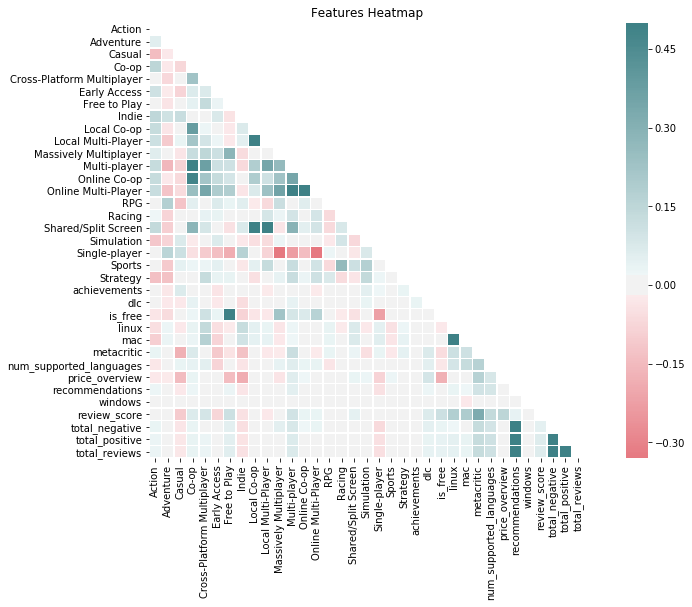

In [58]:
correlations = final_df0.corr()

plt.figure(figsize=(15,8))
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(10, 200, as_cmap=True)
plt.title("Features Heatmap")
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.5, center=0, 
            square=True, linewidths=.5)

In [59]:
final_df0.reset_index(inplace=True)
y = final_df0.price_overview
X = final_df0.drop(["price_overview"], axis=1)

We scale our continuous variables

In [60]:
from sklearn.preprocessing import StandardScaler
x_col = X[["recommendations", 'num_supported_languages','review_score', 'total_negative', 'achievements', 'dlc',
        'total_positive', 'total_reviews', 'required_age','metacritic']]
X_scale = StandardScaler().fit_transform(x_col)

/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [61]:
X_scale

array([[ 2.79761364,  1.08597418,  1.73150082, ...,  3.05658058,
        -0.16961757,  3.92369232],
       [ 0.08573065,  1.31164748,  1.42277695, ...,  0.18784127,
        -0.16961757, -0.30833537],
       [ 0.05077355,  0.40895426,  1.42277695, ...,  0.12011984,
        -0.16961757,  3.4908713 ],
       ...,
       [-0.0349515 , -0.49373895, -1.047014  , ..., -0.05254181,
        -0.16961757, -0.30833537],
       [-0.0349515 , -0.49373895, -1.047014  , ..., -0.05254181,
        -0.16961757, -0.30833537],
       [-0.0349515 , -0.49373895, -1.047014  , ..., -0.05254181,
        -0.16961757, -0.30833537]])

Observe some plots

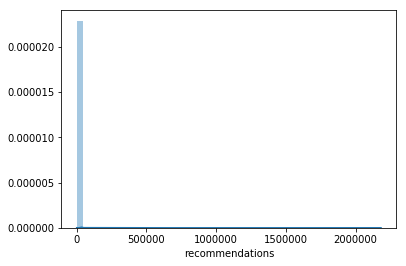

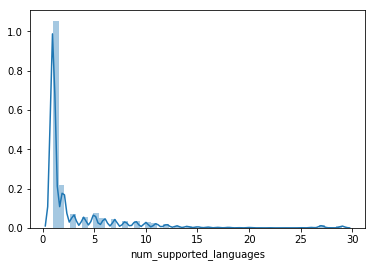

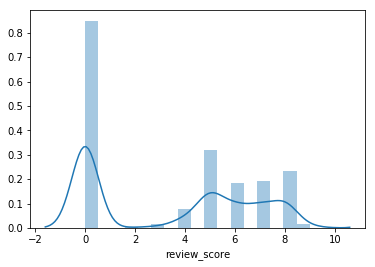

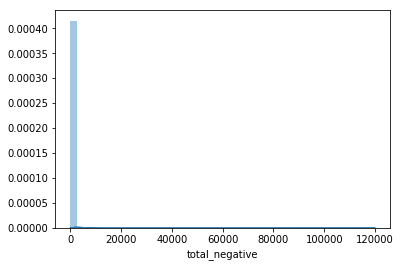

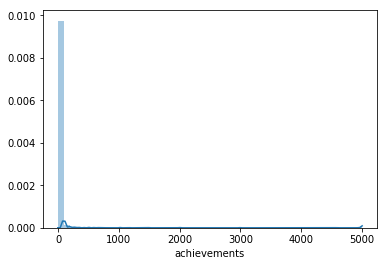

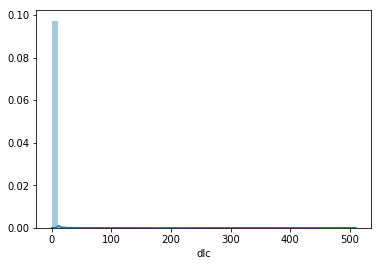

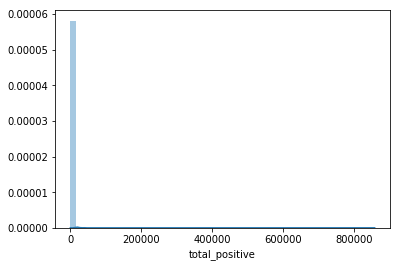

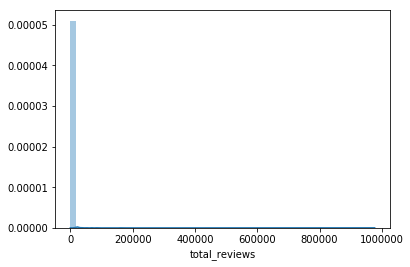

TypeError: unsupported operand type(s) for +: 'int' and 'str'

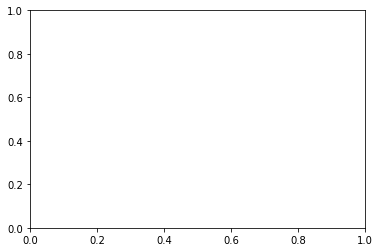

In [62]:
for col in x_col:
    sns.distplot(X[col])
    plt.show()

In [63]:
X_scaled_df = pd.DataFrame(data=X_scale, columns=["recommendations", 'num_supported_languages','review_score', 'total_negative', 'achievements', 'dlc',
        'total_positive', 'total_reviews', 'required_age','metacritic'])

In [64]:
X_drop = X.drop(x_col, axis=1)

In [65]:
X = X_drop.merge(X_scaled_df, on=X_drop.index)

In [66]:
X.head()

,key_0,index,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,...,recommendations,num_supported_languages,review_score,total_negative,achievements,dlc,total_positive,total_reviews,required_age,metacritic
0,0,0,1,0,0,0,0,0,0,0,...,2.797614,1.085974,1.731501,0.499428,-0.120398,-0.084856,3.433450,3.056581,-0.169618,3.923692
1,1,1,1,0,0,0,0,0,0,0,...,0.085731,1.311647,1.422777,0.177711,-0.120398,-0.084856,0.183507,0.187841,-0.169618,-0.308335
2,2,2,1,0,0,0,0,0,0,0,...,0.050774,0.408954,1.422777,0.054549,-0.120398,-0.084856,0.128399,0.120120,-0.169618,3.490871
3,3,3,1,0,0,0,0,0,0,0,...,0.004987,1.311647,1.422777,0.021744,-0.120398,-0.084856,0.025934,0.026000,-0.169618,-0.308335
4,4,4,1,0,0,0,0,0,0,0,...,0.151486,0.183281,1.422777,0.038434,-0.120398,-0.084856,0.261540,0.232896,-0.169618,-0.308335


In [67]:
X.drop(["key_0"], axis=1,inplace=True)

In [68]:
X.head()

,index,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,...,recommendations,num_supported_languages,review_score,total_negative,achievements,dlc,total_positive,total_reviews,required_age,metacritic
0,0,1,0,0,0,0,0,0,0,0,...,2.797614,1.085974,1.731501,0.499428,-0.120398,-0.084856,3.433450,3.056581,-0.169618,3.923692
1,1,1,0,0,0,0,0,0,0,0,...,0.085731,1.311647,1.422777,0.177711,-0.120398,-0.084856,0.183507,0.187841,-0.169618,-0.308335
2,2,1,0,0,0,0,0,0,0,0,...,0.050774,0.408954,1.422777,0.054549,-0.120398,-0.084856,0.128399,0.120120,-0.169618,3.490871
3,3,1,0,0,0,0,0,0,0,0,...,0.004987,1.311647,1.422777,0.021744,-0.120398,-0.084856,0.025934,0.026000,-0.169618,-0.308335
4,4,1,0,0,0,0,0,0,0,0,...,0.151486,0.183281,1.422777,0.038434,-0.120398,-0.084856,0.261540,0.232896,-0.169618,-0.308335


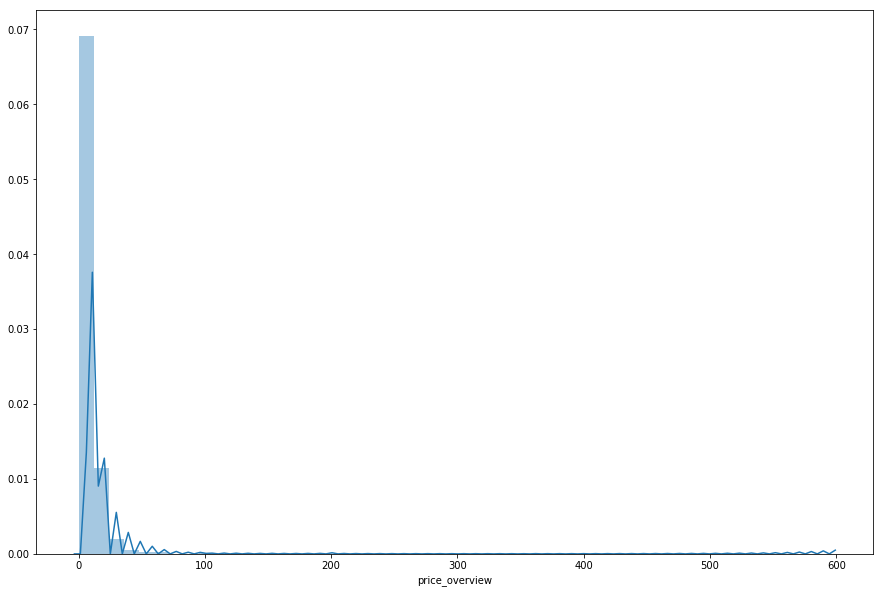

In [69]:
plt.figure(figsize=(15,10))
sns.distplot(y)

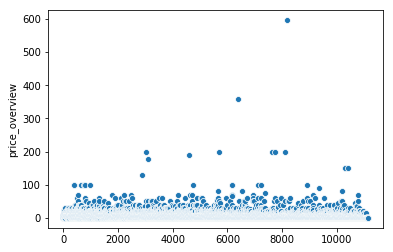

In [70]:
x_lin = np.linspace(1, 11126, 11126)
sns.scatterplot(x_lin, y)

In [71]:
y.mean()

7.114850799928532

In [72]:
y.std()

12.271757173162856

In [73]:
y_df = pd.DataFrame(y.copy())

In [74]:
y_df[y_df.price_overview <= y_df.price_overview.quantile(.25)] = 1
y_df[(y_df.price_overview > y_df.price_overview.quantile(.25)) & (y_df.price_overview <= y_df.price_overview.quantile(.50))] =2
y_df[(y_df.price_overview > y_df.price_overview.quantile(.50)) & (y_df.price_overview <= y_df.price_overview.quantile(.75))] =3
y_df[(y_df.price_overview > y_df.price_overview.quantile(.75))] = 4


In [75]:
y_stats = y_df.astype(int)

In [76]:
y_classes = y_stats.copy()
y_classes = pd.get_dummies(y_classes.price_overview)
y_classes 

,1,2,3,4
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,1,0
8,0,1,0,0
9,1,0,0,0


## Model 1: Decision Tree for y_stats

In [78]:
# !conda install -y pydotplus

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score, mean_squared_error, confusion_matrix, classification_report
from sklearn import tree, svm
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

Solving environment: done

## Package Plan ##

  environment location: /Users/flatironschool/anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |           py36_1          42 KB
    ------------------------------------------------------------
                                           Total:          42 KB

The following NEW packages will be INSTALLED:

  pydotplus          pkgs/main/osx-64::pydotplus-2.0.2-py36_1



pydotplus-2.0.2      | 42 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [108]:
def plot_feature_importances(model, title, X_train):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), pd.DataFrame(X_train).columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title(title)

def run_reports(model, X_train, y_true, y_pred, title):
    plot_feature_importances(model, title, X_train)
    print("Classification Report:")
    print(pd.DataFrame(classification_report(y_true, y_pred, output_dict=True)))
    
  
def decision_tree(Xtrain, Xtest, ytrain, ytest, criterion="gini", max_depth=None):
    clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
    clf.fit(Xtrain, ytrain)
    y_pred_train = clf.predict(Xtrain)
    y_pred_test = clf.predict(Xtest)
    
    acc = accuracy_score(ytrain,y_pred_train) * 100
    print("Our train accuracy is :{0}".format(acc))

    acc = accuracy_score(ytest, y_pred_test) * 100
    print("Our test accuracy is :{0}".format(acc))
    return clf, y_pred_train, y_pred_test



# def tree_model(model, Xtrain, Xtest, ytrain, ytest, params=None):
#     clf = model(params)
#     clf.fit(Xtrain, ytrain)
#     y_pred_train = clf.predict(Xtrain)
#     y_pred_test = clf.predict(Xtest)
    
#     acc = accuracy_score(ytrain,y_pred_train) * 100
#     print("Our train accuracy is :{0}".format(acc))

#     acc = accuracy_score(ytest, y_pred_test) * 100
#     print("Our test accuracy is :{0}".format(acc))
#     return clf, y_pred_train, y_pred_test

Our train accuracy is :49.71910112359551
Our test accuracy is :48.517520215633425


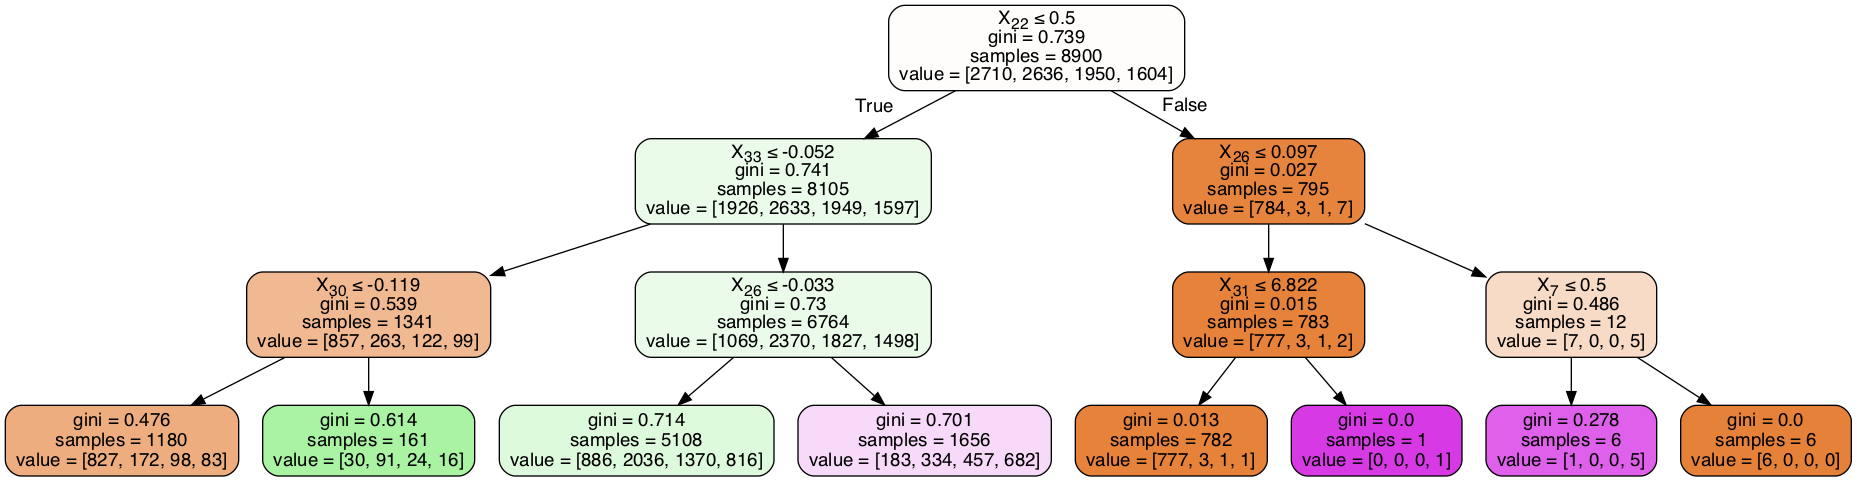

In [115]:
# y stat decision tree based off of all features
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y_stats, test_size=.2)
clf_all, y_pred_train_all, y_pred_test_all = decision_tree(X_train_all, X_test_all, y_train_all, y_test_all,max_depth=3)
dot_data = StringIO()
export_graphviz(clf_all, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Classification Report:
                     1            2       3            4    micro avg  \
f1-score      0.688328     0.538140     0.0     0.421182     0.497191   
precision     0.818089     0.403682     0.0     0.413710     0.497191   
recall        0.594096     0.806904     0.0     0.428928     0.497191   
support    2710.000000  2636.000000  1950.0  1604.000000  8900.000000   

             macro avg  weighted avg  
f1-score      0.411913      0.444886  
precision     0.408870      0.443227  
recall        0.457482      0.497191  
support    8900.000000   8900.000000  


/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


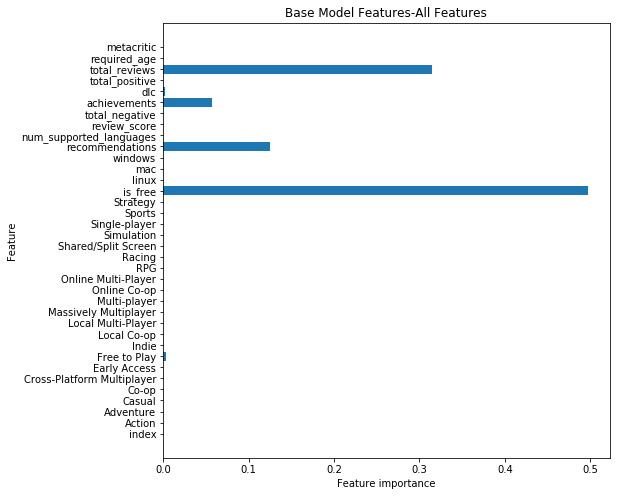

In [116]:
run_reports(clf_all, X_train_all, y_train_all, y_pred_train_all, "Base Model Features-All Features")

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y_stats, test_size=.2)
r_clf = RandomForestClassifier(n_estimators=100, max_depth=5)
r_clf.fit(X_train, y_train)
y_pred_train = r_clf.predict(X_train)
y_pred_test = r_clf.predict(X_test)

acc = r_clf.score(X_train, y_train) * 100
print("Our train accuracy is :{0}".format(acc))

acc = r_clf.score(X_test, y_test) * 100
print("Our test accuracy is :{0}".format(acc))

/Users/flatironschool/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Our train accuracy is :51.59550561797753
Our test accuracy is :50.943396226415096


Classification Report:
                     1            2            3            4    micro avg  \
f1-score      0.691343     0.534481     0.159624     0.458140     0.515955   
precision     0.784781     0.401660     0.510929     0.530966     0.515955   
recall        0.617788     0.798542     0.094588     0.402882     0.515955   
support    2721.000000  2606.000000  1977.000000  1596.000000  8900.000000   

             macro avg  weighted avg  
f1-score      0.460897      0.485480  
precision     0.557084      0.566252  
recall        0.478450      0.515955  
support    8900.000000   8900.000000  


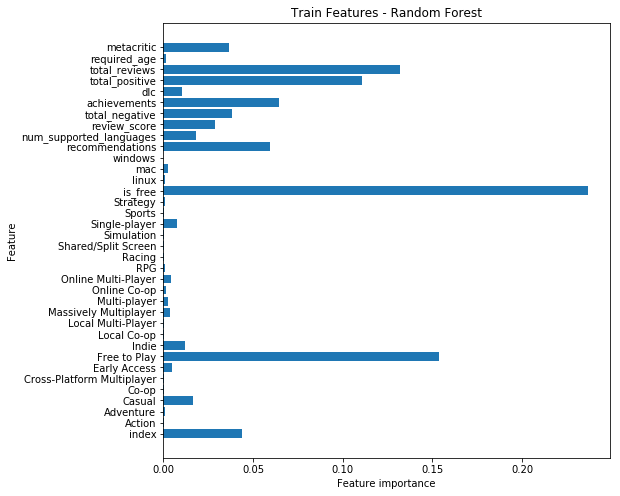

In [143]:
run_reports(r_clf, X_train, y_train, y_pred_train, "Train Features - Random Forest")

## Reduce Dimensionality

In [122]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_scale)


PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Variance Ration Explanation')

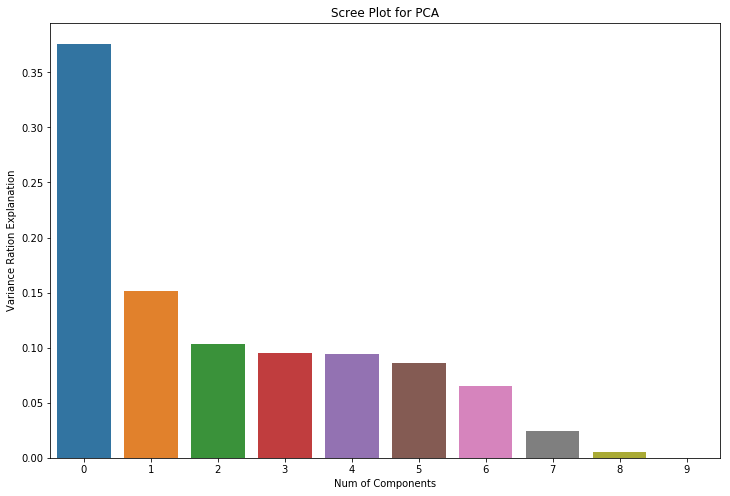

In [123]:
index = np.arange(len(x_col.columns))
plt.figure(figsize=(12,8))
sns.barplot(index, pca.explained_variance_ratio_ )
plt.title("Scree Plot for PCA")
plt.xlabel("Num of Components")
plt.ylabel("Variance Ration Explanation")

In [125]:
eigenvalue = pca.explained_variance_
eigenvector = pca.components_
pca_vect_0 = eigenvector[0]
pca_vect_4 = eigenvector[4]
loading1 = pca_vect_0*np.sqrt(eigenvalue[0])
str_loading1 = pd.Series(loading1, index=x_col.columns)
loading2 = pca_vect_4*np.sqrt(eigenvalue[4])
str_loading2 = pd.Series(loading2, index=x_col.columns)
print("\nFirst Principal Component \n")
print(str_loading1)
print("\nFifth Principal Component\n")
print(str_loading2)


First Principal Component 

recommendations            0.969910
num_supported_languages    0.159526
review_score               0.114571
total_negative             0.912863
achievements               0.016469
dlc                        0.066519
total_positive             0.962354
total_reviews              0.981989
required_age               0.106975
metacritic                 0.203666
dtype: float64

Fifth Principal Component

recommendations            0.005006
num_supported_languages   -0.651535
review_score              -0.175448
total_negative             0.030228
achievements               0.067041
dlc                        0.314779
total_positive            -0.004456
total_reviews              0.001038
required_age               0.615007
metacritic                 0.034492
dtype: float64


### Observation

PCA shows us that we can reduce some components. We will drop the lasr 3 features mention prior and replace the other features with their scaled values

In [127]:
pca = PCA(n_components=7)
principal_comps = pca.fit_transform(X_scale)
principalDF = pd.DataFrame(data=principal_comps, columns=[f"PC_{i}" for i in range(7)])

In [128]:
principalDF.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
0,5.476379,-2.786646,-0.483873,-0.350110,-1.029906,-1.298688,1.819174
1,0.459001,-0.928939,0.073439,0.113436,-1.288520,-0.042497,-1.111873
2,0.646649,-2.878333,-0.464183,-0.332370,-0.550287,-1.299210,1.854993
3,0.185050,-0.969825,0.075376,0.114325,-1.293251,-0.035645,-1.106015
4,0.395044,-0.522043,-0.048553,-0.016564,-0.534259,-0.746611,-1.028922


In [131]:
X_no_cont = X.drop(x_col, axis=1)
X_no_cont.reset_index(inplace=True)
X_no_cont.drop(["index"], axis=1, inplace=True)
X_merge_pca = X_no_cont.merge(principalDF, on=X_no_cont.index)
X_merge_pca.drop(["key_0", "level_0"], axis=1, inplace=True)
X_merge_pca

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,linux,mac,windows,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
0,1,0,0,0,0,0,0,0,0,1,...,1,1,1,5.476379,-2.786646,-0.483873,-0.350110,-1.029906,-1.298688,1.819174
1,1,0,0,0,0,0,0,0,0,1,...,1,1,1,0.459001,-0.928939,0.073439,0.113436,-1.288520,-0.042497,-1.111873
2,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0.646649,-2.878333,-0.464183,-0.332370,-0.550287,-1.299210,1.854993
3,1,0,0,0,0,0,0,0,0,1,...,1,1,1,0.185050,-0.969825,0.075376,0.114325,-1.293251,-0.035645,-1.106015
4,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0.395044,-0.522043,-0.048553,-0.016564,-0.534259,-0.746611,-1.028922
5,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0.396896,-0.938622,0.073967,0.113697,-1.289496,-0.040850,-1.110349
6,1,0,0,0,0,0,0,0,0,0,...,1,1,1,2.579088,-3.527389,-0.408566,-0.236772,-0.970565,-1.267143,2.199498
7,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1.115451,-2.642028,-0.317580,-0.196954,-1.023877,-0.769533,1.277131
8,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0.658359,-2.476129,-0.468927,-0.349655,-0.259508,-1.511123,1.593528
9,1,0,0,0,1,0,1,0,0,0,...,1,1,1,35.826787,-0.094086,1.122779,-0.811817,-3.329788,0.508431,1.324823


## Baseline Model was poor let's try a Random Forest

Include Max_features

In [140]:
n_est = np.array([1, 10, 100]) 
max_d = np.array([2, 5]) 
max_f = np.array([2, 4, len(X_train.columns)])

for n in n_est:
    for d in max_d:
        for f in max_f:
            r_clf = RandomForestClassifier(n_estimators=int(n), max_depth=d, max_features=f)
            r_clf.fit(X_train, y_train)
            y_pred_train = r_clf.predict(X_train)
            y_pred_test = r_clf.predict(X_test)

            print(f"n_estimators: {n}, max_depth: {d}, max_features:{f} ")
            acc = r_clf.score(X_train, y_train) * 100
            print("Our train accuracy is :{0}".format(acc))

            acc = r_clf.score(X_test, y_test) * 100
            print("Our test accuracy is :{0}".format(acc))
            print("\n")

n_estimators: 1, max_depth: 2, max_features:2 
Our train accuracy is :35.741573033707866
Our test accuracy is :35.489667565139264


n_estimators: 1, max_depth: 2, max_features:4 
Our train accuracy is :35.62921348314607
Our test accuracy is :36.477987421383645




/Users/flatironschool/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

n_estimators: 1, max_depth: 2, max_features:36 
Our train accuracy is :44.56179775280899
Our test accuracy is :45.82210242587601


n_estimators: 1, max_depth: 5, max_features:2 
Our train accuracy is :40.764044943820224
Our test accuracy is :41.06019766397125


n_estimators: 1, max_depth: 5, max_features:4 
Our train accuracy is :42.21348314606742
Our test accuracy is :41.41958670260557


n_estimators: 1, max_depth: 5, max_features:36 
Our train accuracy is :50.0
Our test accuracy is :50.17969451931717


n_estimators: 10, max_depth: 2, max_features:2 


/Users/flatironschool/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Our train accuracy is :43.71910112359551
Our test accuracy is :44.15992812219227


n_estimators: 10, max_depth: 2, max_features:4 
Our train accuracy is :47.662921348314605
Our test accuracy is :48.33782569631626


n_estimators: 10, max_depth: 2, max_features:36 
Our train accuracy is :44.58426966292135
Our test accuracy is :45.73225516621743


n_estimators: 10, max_depth: 5, max_features:2 
Our train accuracy is :50.5056179775281
Our test accuracy is :51.30278526504941


n_estimators: 10, max_depth: 5, max_features:4 
Our train accuracy is :51.24719101123596
Our test accuracy is :52.51572327044025




/Users/flatironschool/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


n_estimators: 10, max_depth: 5, max_features:36 
Our train accuracy is :52.30337078651686
Our test accuracy is :52.695417789757414




/Users/flatironschool/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


n_estimators: 100, max_depth: 2, max_features:2 
Our train accuracy is :46.842696629213485
Our test accuracy is :48.47259658580413




/Users/flatironschool/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


n_estimators: 100, max_depth: 2, max_features:4 
Our train accuracy is :47.47191011235955
Our test accuracy is :48.29290206648697




/Users/flatironschool/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


n_estimators: 100, max_depth: 2, max_features:36 
Our train accuracy is :44.58426966292135
Our test accuracy is :45.73225516621743




/Users/flatironschool/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


n_estimators: 100, max_depth: 5, max_features:2 
Our train accuracy is :51.067415730337075
Our test accuracy is :52.42587601078167




/Users/flatironschool/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


n_estimators: 100, max_depth: 5, max_features:4 
Our train accuracy is :51.28089887640449
Our test accuracy is :52.60557053009883




/Users/flatironschool/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


n_estimators: 100, max_depth: 5, max_features:36 
Our train accuracy is :51.752808988764045
Our test accuracy is :51.75202156334232




# Drop some of the features that weren't important

In [84]:
# !pip install scikit-multilearn
from sklearn.multiclass import OneVsRestClassifier


,1,2,3,4
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,1,0
8,0,1,0,0
9,1,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_drop_features, y_classes[1], test_size=.2)
r_clf = RandomForestClassifier(n_estimators=100, max_depth=5)
r_clf.fit(X_train, y_train)
y_pred_train = r_clf.predict(X_train)
y_pred_test = r_clf.predict(X_test)

acc = r_clf.score(X_train, y_train) * 100
print("Our train accuracy is :{0}".format(acc))

acc = r_clf.score(X_test, y_test) * 100
print("Our test accuracy is :{0}".format(acc))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_drop_features, y_classes[1], test_size=.2)
r_clf = RandomForestClassifier(n_estimators=100, max_depth=5)
r_clf.fit(X_train, y_train)
y_pred_train = r_clf.predict_proba(X_train)
y_pred_test = r_clf.predict_proba(X_test)

print("Test Prob: ", y_pred_test)

In [ ]:
X_drop_features = X_merge_pca[["PC_6","PC_5","PC_4","PC_3","PC_2","PC_1","PC_0", "is_free", "Indie", "Casual", "Free to Play"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_drop_features, y_stats, test_size=.2)
r_clf = RandomForestClassifier(n_estimators=100, max_depth=5)
r_clf.fit(X_train, y_train)
y_pred_train = r_clf.predict(X_train)
y_pred_test = r_clf.predict(X_test)

acc = r_clf.score(X_train, y_train) * 100
print("Our train accuracy is :{0}".format(acc))

acc = r_clf.score(X_test, y_test) * 100
print("Our test accuracy is :{0}".format(acc))


In [ ]:
r_clf2 = r_clf.estimators_[0]

In [ ]:
# the features of importance of the first tree
plot_feature_importances(r_clf2, "Features of first Tree")


In [ ]:
r_clf3 = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=30)
r_clf3.fit(X_train, y_train1)
y_pred_train = r_clf3.predict(X_train)
y_pred_test = r_clf3.predict(X_test)

acc = r_clf3.score(X_train, y_train1) * 100
print("Our train accuracy is :{0}".format(acc))

acc = r_clf3.score(X_test, y_test1) * 100
print("Our test accuracy is :{0}".format(acc))

In [ ]:
run_reports(r_clf3, y_test1, y_pred_test, "Test Features")

In [ ]:
r_clf4 = RandomForestClassifier(n_estimators=100, max_depth=15, max_features=10)
r_clf4.fit(X_train, y_train1)
y_pred_train = r_clf4.predict(X_train)
y_pred_test = r_clf4.predict(X_test)

acc = r_clf4.score(X_train, y_train1) * 100
print("Our train accuracy is :{0}".format(acc))

acc = r_clf4.score(X_test, y_test1) * 100
print("Our test accuracy is :{0}".format(acc))

In [ ]:
X_dropisfree = X_final.drop('is_free', axis =1)

In [ ]:
X_train, X_test, y_train1, y_test1 = train_test_split(X_dropisfree, y_stats, test_size=.2, random_state=56)
clf, y_pred_train, y_pred_test = decision_tree(X_train, X_test, y_train1, y_test1)

In [ ]:
clf, y_pred_train, y_pred_test = decision_tree(X_train, X_test, y_train1, y_test1, "entropy", 10)

In [ ]:
X_dropisfree = X_dropisfree.drop('windows', axis =1)

In [ ]:
X_train, X_test, y_train1, y_test1 = train_test_split(X_dropisfree, y_stats, test_size=.2, random_state=56)
clf, y_pred_train, y_pred_test = decision_tree(X_train, X_test, y_train1, y_test1)

In [ ]:
clf, y_pred_train, y_pred_test = decision_tree(X_train, X_test, y_train1, y_test1, "entropy", 10)

In [ ]:
run_reports(clf, y_train1, y_pred_train, "Train Features")

In [ ]:
r_clf5 = RandomForestClassifier(n_estimators=100, max_depth=15, max_features=10)
r_clf5.fit(X_train, y_train1)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

acc = r_clf5.score(X_train, y_train1) * 100
print("Our train accuracy is :{0}".format(acc))

acc = r_clf5.score(X_test, y_test1) * 100
print("Our test accuracy is :{0}".format(acc))

In [ ]:
X_dropisfree = X_dropisfree.drop(['Shared/Split Screen', 'Local Co-op', 'Cross-Platform Multiplayer'], axis =1)

In [ ]:
X_train, X_test, y_train1, y_test1 = train_test_split(X_dropisfree, y_stats, test_size=.2, random_state=56)
clf, y_pred_train, y_pred_test = decision_tree(X_train, X_test, y_train1, y_test1)

In [ ]:
r_clf5 = RandomForestClassifier(n_estimators=100, max_depth=15, max_features=10)
r_clf5.fit(X_train, y_train1)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

acc = r_clf5.score(X_train, y_train1) * 100
print("Our train accuracy is :{0}".format(acc))

acc = r_clf5.score(X_test, y_test1) * 100
print("Our test accuracy is :{0}".format(acc))

## Model is not much better let's use XGBoost

In [ ]:
# !conda install -y py-xgboost
# !conda install -y nomkl
import xgboost as xgb
# import os
# os.environ["KMP_DUPLICATE_LIB_OK"]='True'

In [ ]:
y_classes.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_merge_pca, y_stats, test_size=.2)

x_clf = xgb.XGBClassifier()
x_clf.fit(X_train, y_train)
y_train_pred = x_clf.predict(X_train)
y_test_pred = x_clf.predict(X_test)

acc = accuracy_score(y_train,y_pred_train) * 100
print("Our train accuracy is :{0}".format(acc))

acc = accuracy_score(y_test, y_pred_test) * 100
print("Our test accuracy is :{0}".format(acc))

In [ ]:
help(xgb.XGBClassifier)

In [134]:
param= {
    "max_depth":[2, 3, 5],
    "min_child_weight":[.05, .1, .2],
    "n_estimators":[10, 50, 100]
}

In [135]:
grid_clf = GridSearchCV(r_clf, param, scoring="accuracy", cv=None, n_jobs=-1)
grid_clf.fit(X_merge_pca, y_stats)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


ValueError: Invalid parameter min_child_weight for estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_merge_pca, y_stats, test_size=.2)
decision_tree(X_train, X_test, y_train, y_test, max_depth = 5)

Our train accuracy is :48.337078651685395
Our test accuracy is :45.103324348607366


(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 array([2, 2, 1, ..., 4, 2, 4]),
 array([2, 2, 2, ..., 2, 1, 2]))

In [145]:
c_range = np.array([.1, 1, 10]) 
gamma_range = np.array([.1, 1, 100]) 

for c in c_range:
    for gam in gamma_range:
        svm_clf = svm.SVC(kernel='rbf', degree=4, C=c, gamma=gam)
        svm_clf.fit(X_train,y_train)
        y_pred_train = svm_clf.predict(X_train)
        y_pred_test = svm_clf.predict(X_test)

        acc = svm_clf.score(X_train, y_train) * 100
        print("Our train accuracy is :{0}".format(acc))

        acc = svm_clf.score(X_test, y_test) * 100
        print("Our test accuracy is :{0}".format(acc))

/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Our train accuracy is :47.42696629213483
Our test accuracy is :43.5759209344115


/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Our train accuracy is :40.70786516853933
Our test accuracy is :39.39802336028751


/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Our train accuracy is :31.741573033707866
Our test accuracy is :32.16531895777179


/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Our train accuracy is :52.41573033707865
Our test accuracy is :50.58400718778078


/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Our train accuracy is :71.0
Our test accuracy is :70.44025157232704


/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Our train accuracy is :84.28089887640449
Our test accuracy is :84.63611859838275


/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Our train accuracy is :60.46067415730337
Our test accuracy is :58.625336927223714


/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Our train accuracy is :77.91011235955057
Our test accuracy is :77.35849056603774


/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Our train accuracy is :86.6629213483146
Our test accuracy is :86.79245283018868


In [148]:
print("Classifying less than $.99 or not")
X_train, X_test, y_train, y_test = train_test_split(X_merge_pca, y_classes[1], test_size=.2)
decision_tree(X_train, X_test, y_train, y_test, max_depth = 5)
print("\n")
print("Classifying between $.99 and $4.99 or not")
X_train, X_test, y_train, y_test = train_test_split(X_merge_pca, y_classes[2], test_size=.2)
decision_tree(X_train, X_test, y_train, y_test, max_depth = 5)
print("\n")
print("Classifying between $4.99 and $9.99 or not")
X_train, X_test, y_train, y_test = train_test_split(X_merge_pca, y_classes[3], test_size=.2)
decision_tree(X_train, X_test, y_train, y_test, max_depth = 5)
print("\n")
print("Classifying more than $9.99 or not")
X_train, X_test, y_train, y_test = train_test_split(X_merge_pca, y_classes[4], test_size=.2)
decision_tree(X_train, X_test, y_train, y_test, max_depth = 5)
print("\n")

Classifying less than $.99 or not
Our train accuracy is :83.29213483146067
Our test accuracy is :81.44654088050315


Classifying between $.99 and $4.99 or not
Our train accuracy is :71.1685393258427
Our test accuracy is :69.63162623539982


Classifying between $4.99 and $9.99 or not
Our train accuracy is :78.13483146067416
Our test accuracy is :76.81940700808624


Classifying more than $9.99 or not
Our train accuracy is :83.66292134831461
Our test accuracy is :83.78256963162623




Classifying less than $.99 or not
Classification Report:
                     0            1    micro avg    macro avg  weighted avg
f1-score      0.936121     0.831116     0.907303     0.883618      0.904077
precision     0.898083     0.935915     0.907303     0.916999      0.909629
recall        0.977523     0.747423     0.907303     0.862473      0.907303
support    6184.000000  2716.000000  8900.000000  8900.000000   8900.000000
Classification Report:
                     0           1    micro avg    macro avg  weighted avg
f1-score      0.894190    0.707276     0.844564     0.800733      0.838015
precision     0.853473    0.814815     0.844564     0.834144      0.841855
recall        0.938985    0.624813     0.844564     0.781899      0.844564
support    1557.000000  669.000000  2226.000000  2226.000000   2226.000000


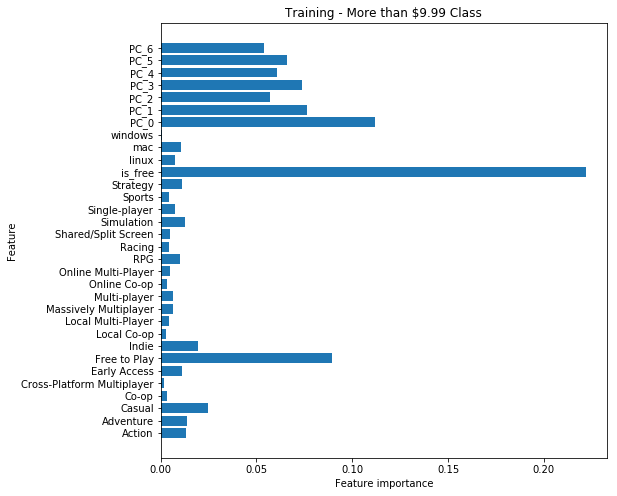

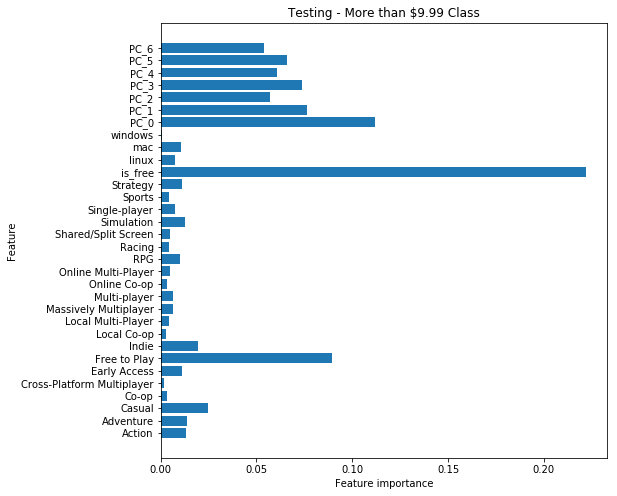

In [190]:
print("Classifying less than $.99 or not")
X_train, X_test, y_train, y_test = train_test_split(X_merge_pca, y_classes[1], test_size=.2)
clf = RandomForestClassifier(n_estimators=100, max_depth=15, max_features=10)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

run_reports(clf, X_train, y_train, y_pred_train, "Training - More than $9.99 Class")
run_reports(clf, X_test, y_test, y_pred_test, "Testing - More than $9.99 Class")





Classifying between $.99 and $4.99 or not
Classification Report:
                     0            1    micro avg    macro avg  weighted avg
f1-score      0.935073     0.826491     0.905506     0.880782      0.901998
precision     0.895328     0.937734     0.905506     0.916531      0.908245
recall        0.978510     0.738842     0.905506     0.858676      0.905506
support    6189.000000  2711.000000  8900.000000  8900.000000   8900.000000
Classification Report:
                     0           1    micro avg    macro avg  weighted avg
f1-score      0.888956    0.686695     0.836029     0.787826      0.827715
precision     0.842075    0.814664     0.836029     0.828369      0.833775
recall        0.941366    0.593472     0.836029     0.767419      0.836029
support    1552.000000  674.000000  2226.000000  2226.000000   2226.000000


Classifying between $4.99 and $9.99 or not
Classification Report:
                     0            1   micro avg    macro avg  weighted avg
f1-score    

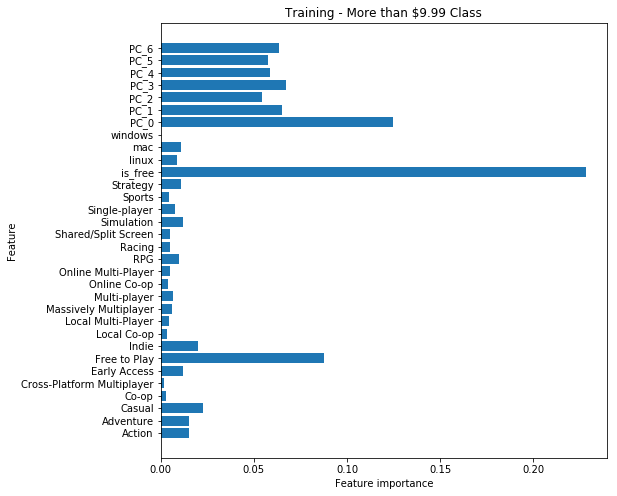

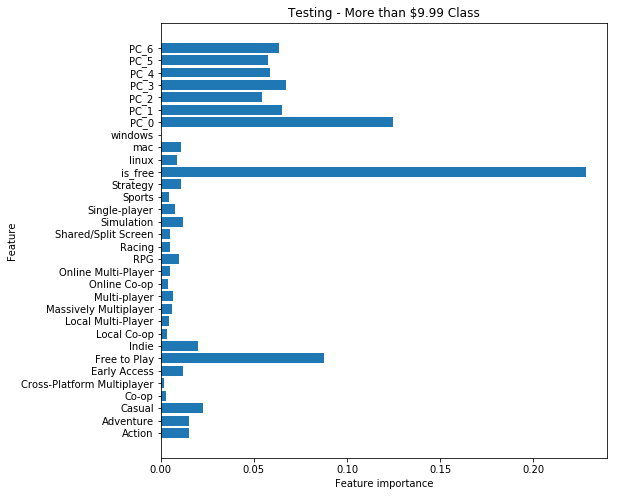

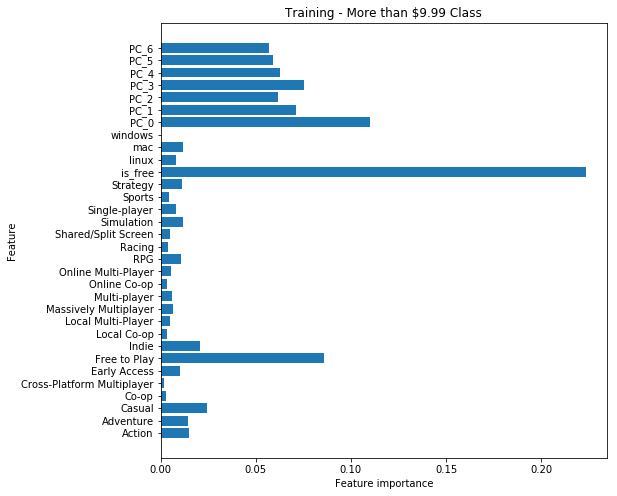

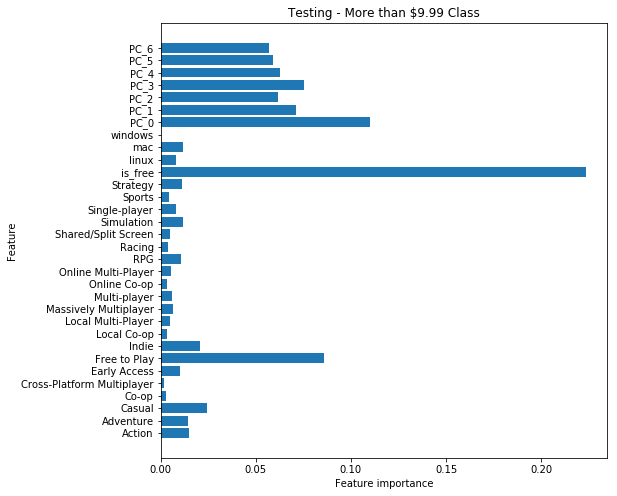

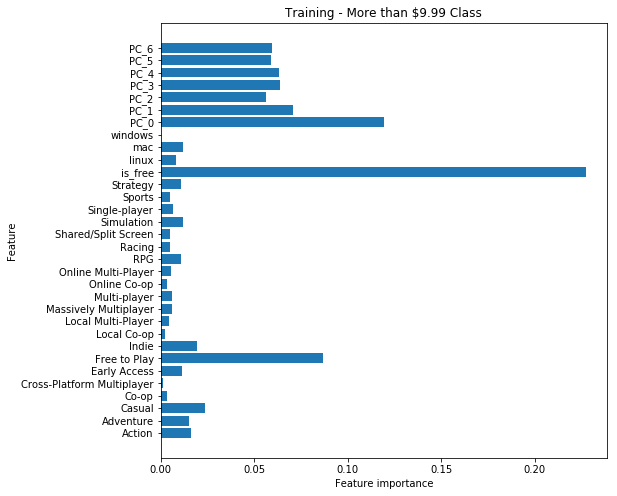

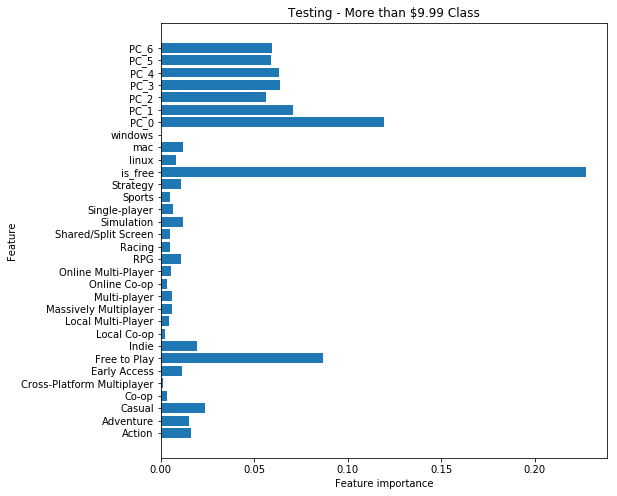

In [189]:
print("\n")
print("Classifying between $.99 and $4.99 or not")
X_train, X_test, y_train, y_test = train_test_split(X_merge_pca, y_classes[1], test_size=.2)
clf = RandomForestClassifier(n_estimators=100, max_depth=15, max_features=10)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

run_reports(clf, X_train, y_train, y_pred_train, "Training - More than $9.99 Class")
run_reports(clf, X_test, y_test, y_pred_test, "Testing - More than $9.99 Class")

print("\n")
print("Classifying between $4.99 and $9.99 or not")
X_train, X_test, y_train, y_test = train_test_split(X_merge_pca, y_classes[1], test_size=.2)
clf = RandomForestClassifier(n_estimators=100, max_depth=15, max_features=10)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

run_reports(clf, X_train, y_train, y_pred_train, "Training - More than $9.99 Class")
run_reports(clf, X_test, y_test, y_pred_test, "Testing - More than $9.99 Class")

print("\n")
print("Classifying more than $9.99 or not")
X_train, X_test, y_train, y_test = train_test_split(X_merge_pca, y_classes[1], test_size=.2)
clf = RandomForestClassifier(n_estimators=100, max_depth=15, max_features=10)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

run_reports(clf, X_train, y_train, y_pred_train, "Training - More than $9.99 Class")
run_reports(clf, X_test, y_test, y_pred_test, "Testing - More than $9.99 Class")

print("\n")

In [153]:
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


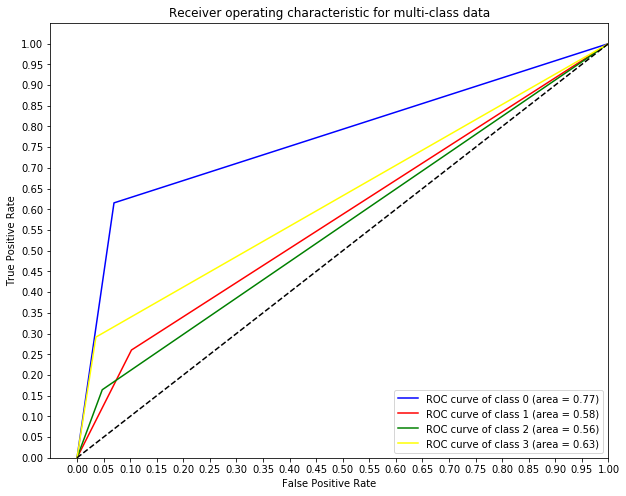

In [181]:
y = label_binarize(y_stats, classes=[1, 2, 3, 4])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)


classifier = OneVsRestClassifier(RandomForestClassifier())
y_score = classifier.fit(X_train, y_train).predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow'])
plt.figure(figsize=(10,8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [186]:
classifier = OneVsRestClassifier(RandomForestClassifier())
y_score = classifier.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_score)

/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.3306379155435759

In [167]:
y_score

array([[0. , 0.5, 0.2, 0.1],
       [0.2, 0.4, 0.2, 0. ],
       [0.2, 0.3, 0.3, 0.3],
       ...,
       [0.4, 0.1, 0.1, 0.7],
       [0.1, 0.6, 0. , 0. ],
       [0.7, 0.3, 0. , 0.2]])